# Helen Bliss: Python ETL and data visualisation - individual project

## Online Retail Transactional Data Analysis to understand buyer behaviour

Project objectives:
    - Understand the UK subset of online retail data
    – Provide customer segments and recommendations to the marketing department.

Personal objectives:
    - Learn how to clean a large dataset of 55,000 records
    - Complete my first coding project end-to-end
    - Learn from trial and error

## Load the Dataset

In [182]:
import numpy as np
import pandas as pd

In [183]:
# Load the data
df = pd.read_csv("online_retail_raw_dataset.csv")

# Initial dataset review

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 33.1+ MB


In [99]:
# Check the shape and first/last rows

print(df.shape)
df.head(10)

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom


In [100]:
df.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France


In [101]:
# Viewing the head and tail of the data shows that the values APPEAR to be accurate with no missing values. We'll see later on. 
# This is a large dataset of over 50,000 records. I'm interested in all columns so can't filter at this point.

In [186]:
# Assessing variables within the dataset

# 1. Number of unique products (stock codes)
df['StockCode'].nunique()

4070

In [103]:
# Match up stock codes with their product description
stockcode_desc = df[['StockCode', 'Description']].drop_duplicates()
stockcode_desc

,StockCode,Description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,71053,WHITE METAL LANTERN
2,84406B,CREAM CUPID HEARTS COAT HANGER
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E,RED WOOLLY HOTTIE WHITE HEART.
...,...,...
537224,47591b,SCOTTIES CHILDRENS APRON
537621,85123A,CREAM HANGING HEART T-LIGHT HOLDER
538554,85175,NaN
538919,23169,smashed


In [104]:
# Noted 'NaN' and 'smashed' in product description column above. To be handled in data cleaning.
# Noted 5752 stock code rows, whereas 4070 uniques.  To be handled in data cleaning.

In [105]:
# Save full list of unique stock codes and desciptions for reference from the raw fata file. 
stockcode_desc.to_csv("unique_stockcodes.csv", index=False)

In [106]:
# Establish how many unique customers are in the dataset
df['CustomerID'].nunique()

4372

In [107]:
# Establish how many unique product descriptions are in the dataset
df['Description'].nunique()

4223

In [108]:
# Establish how many unique countries are in the dataset
df['Country'].nunique()

38

In [109]:
# On initial review of the data, the number of unique stock codes is not equal to the number of unique product descriptions.
# I want to check how many stock codes have multiple product descriptions

duplicates = df.groupby('StockCode')['Description'].nunique()
duplicates[duplicates > 1]

StockCode
10080           2
10133           2
15058A          2
15058C          2
16008           2
               ..
90195A          2
90210D          2
DCGS0003        2
DCGS0069        2
gift_0001_20    2
Name: Description, Length: 650, dtype: int64

In [110]:
# 650 of the stock codes have more than one description related to the stock code
# I will need to address this when transforming the data. It's likely that there are inconsistencies in product description text.

In [111]:
# Review missing data

# Locate missing data
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [112]:
# Double check no NaN or blank cells across the dataset by addressing another way:
df[df.isna().any(axis=1) | (df == '').any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,15287,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,15287,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,15287,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,15287,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,15287,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,15287,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,15287,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,15287,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,15287,United Kingdom


Product validation

In [113]:
# Confirms count of 1454 missing values, all within the description column. 

In [114]:
# Review sample head and tail of product descriptions for topline view of anomolies:

df['Description'].drop_duplicates().sort_values().head(50)



1057            4 PURPLE FLOCK DINNER CANDLES
309257          50'S CHRISTMAS GIFT BAG LARGE
276939                      DOLLY GIRL BEAKER
334343            I LOVE LONDON MINI BACKPACK
379954            I LOVE LONDON MINI RUCKSACK
371165                NINE DRAWER OFFICE TIDY
5400               OVAL WALL MIRROR DIAMANTE 
288596                RED SPOT GIFT BAG LARGE
40            SET 2 TEA TOWELS I LOVE LONDON 
115204                 SPACEBOY BABY GIFT SET
227683               TOADSTOOL BEDSIDE LIGHT 
325437                      TRELLIS COAT RACK
20749                   *Boombox Ipod Classic
35675                 *USB Office Mirror Ball
448                    10 COLOUR SPACEBOY PEN
4022               12 COLOURED PARTY BALLOONS
565                 12 DAISY PEGS IN WOOD BOX
10479               12 EGG HOUSE PAINTED WOOD
471166           12 HANGING EGGS HAND PAINTED
2551         12 IVORY ROSE PEG PLACE SETTINGS
969           12 MESSAGE CARDS WITH ENVELOPES
1096            12 PENCIL SMALL TU

In [115]:
df['Description'].drop_duplicates().sort_values().tail(50)

487976                       rusty throw away
487975                      rusty thrown away
174044                                samples
73589                         samples/damages
107041                               showroom
201488                                smashed
323461                              sold as 1
140283                          sold as 22467
222006                  sold as set by dotcom
220844                  sold as set on dotcom
221186       sold as set on dotcom and amazon
192166                sold as set/6 by dotcom
140200                           sold in set?
478966                sold with wrong barcode
381675                            stock check
277345                stock creditted wrongly
336411                            taig adjust
302846                   taig adjust no stock
332824                        temp adjustment
332404                                   test
115818                             throw away
82794                             

# Approach to Online Retail ETL

# 1. Basic cleaning: 
    Clean the text in each column to remove any spaces etc,
    Tidy title casing,
    Review data types and convert as needed (e.g. change InvoiceDate column to 'datetime'),
    Review initial missing data across the dataset (NaN).

# 2. Product validation: 
    Handle invalid description/stock codes - remove when validated as invalid.
    Address the stock codes with multiple product descriptions (x650 at this stage). De-dupe records /replace text as required. 
    
# 3. Add sales features:  (simplifies later grouping and ranking),
    Create new column 'Sales Total' (quantity * unit price),
    Add columns for sales month and year, create basket value column. 
    Identify rows with zero 'Unit Price' values and remove (complete after sales total column is created).

# 4. Final validation checks.

# 5. Data enrichment and features:
    Aggregate customer records,
    Customer segmentation to enable analysis of lapsed customers, repeat customers, multibuy customers.

# DATA CLEANING

# 1. Basic data cleaning

1. Clean text columns

In [116]:
def clean_text_columns(df):
    """Remove spaces and fix text case in key columns."""
    df['InvoiceNo']   = df['InvoiceNo'].astype(str).str.strip()
    df['StockCode']   = df['StockCode'].astype(str).str.strip()
    df['Description'] = df['Description'].astype(str).str.strip().str.title()
    df['Country']     = df['Country'].astype(str).str.strip()
    print("Text columns cleaned")
    return df


In [117]:
df = clean_text_columns(df)

Text columns cleaned


2. Fix data types

In [118]:
def fix_data_types(df):
    """Convert numeric and date columns to correct types."""
    df['Quantity']    = pd.to_numeric(df['Quantity'], errors='coerce')
    df['UnitPrice']   = pd.to_numeric(df['UnitPrice'], errors='coerce')
    df['CustomerID']  = pd.to_numeric(df['CustomerID'], errors='coerce')
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
    print("Data types converted")
    return df


In [119]:
df = fix_data_types(df)

Data types converted


3. Handle missing and invalid data

In [120]:
def handle_missing_data(df):
    """Remove invalid or empty product rows."""
    # Replace non-sales words with NaN
    df['Description'] = df['Description'].replace(
            ['Test', 'test', 'Missing', 'missing', 'Null', 'null', 'N/A', 'na', '? sold as sets ?','?? Lost','?? missing','??','?','20713 wrongly marked','20713', 'add stock to allocate online orders', 'Adjust bad debt', 'Adjust Bad Debt', 'adjust', 'adjustment', 'AMAZON FEE', 'Amazon Fee', 'Amazon sold sets','AMAZON','Bank charges', 'Bank Charges', 'Breakages','CARRIAGES', 'Carriage','CHECK','check','credit','Crushed','Dagamed','damage','damaged stock','damaged','DAMAGED','damages','Discount','display','Display', 'Dotcom postage','Dotcom sales','Dotcom','ebay','FBA','Found','Had been put aside','High Resolution Image','Historic computer difference','incorrect stock entry','incorrectly credited','John Lewis','label mix up','lost ??','lost in space', 'mailout', 'manual', 'Manual','Marked as','michel oops','Missing','missing','mix up','mouldy','mystery', 'Nan', 'Next Day Carriage','Not rcvd', 'Null', 'null', 'N/A', 'na','on cargo order', 'Packaging charge', 'printing smudges / thrown away','re-adjustment','returned','reverse','rusty','Sale Error','SAMPLES','samples', 'Samples', 'Show Samples','showroom','smashed','Sold as 1 on dotcom','sold as set on dotcom','test','thown away','throw away','thrown away','Unsaleable, destroyed','water damage','Water damaged','wet pallet','Wet-pallet','wet','WET/MOULDY','wrong barcode','Wrongly marked','wrongly marked'],
        pd.NA
    )

    # Remove above known non-sales rows
    df = df[~(df['Description'].isna())]  

    # Remove cancelled invoices (start with 'C') and negative/zero quantities
    df = df[~df['InvoiceNo'].str.startswith('C')]
    df = df[df['Quantity'] > 0]

    print(f"Invalid records removed — {len(df):,} rows remain")
    return df


In [121]:
df = handle_missing_data(df)

Invalid records removed — 530,075 rows remain


# 2. Product validation

1. Address stock codes with multiple descriptions

In [122]:
# Count how many unique descriptions each StockCode has
desc_counts = df.groupby('StockCode')['Description'].nunique().sort_values(ascending=False)

# Filter only StockCodes with more than one unique description
duplicates = desc_counts[desc_counts > 1]

print(f"Number of StockCodes with multiple descriptions: {len(duplicates)}")
duplicates.head(10)


Number of StockCodes with multiple descriptions: 303


StockCode
23084    6
20713    4
23236    4
23209    4
23203    4
23196    4
23131    4
22937    3
22925    3
23091    3
Name: Description, dtype: int64

In [123]:
# Create lookup of most frequent Description for each StockCode
lookup = (
    df.groupby(['StockCode', 'Description'])
      .size()
      .reset_index(name='count')
      .sort_values(['StockCode', 'count'], ascending=[True, False])
)

# Keep the top (most frequent) description per StockCode
lookup = lookup.drop_duplicates(subset='StockCode', keep='first')[['StockCode', 'Description']]

print(f"Lookup table created for {len(lookup)} StockCodes")
lookup.head(10)

Lookup table created for 3916 StockCodes


,StockCode,Description
0,10002,Inflatable Political Globe
2,10080,Groovy Cactus Inflatable
3,10120,Doggy Rubber
4,10123C,Hearts Wrapping Tape
5,10124A,Spots On Red Bookcover Tape
6,10124G,Army Camo Bookcover Tape
7,10125,Mini Funky Design Tapes
8,10133,Colouring Pencils Brown Tube
9,10135,Colouring Pencils Brown Tube
10,11001,Asstd Design Racing Car Pen


In [124]:
# Replace all inconsistent or missing descriptions with the preferred ones.
df = df.drop(columns=['Description']).merge(lookup, on='StockCode', how='left')

In [125]:
# Check for any remaining stock codes with more than 1 description:
check = df.groupby('StockCode')['Description'].nunique().sort_values(ascending=False)

# Filter to show only StockCodes where count > 1
duplicates = check[check > 1]

print(f"Found {len(duplicates)} StockCodes with multiple Descriptions")
duplicates

Found 0 StockCodes with multiple Descriptions


Series([], Name: Description, dtype: int64)

In [126]:
# Check unique StockCodes & Descriptions together
unique_pairs = df[['StockCode', 'Description']].drop_duplicates().shape[0]
print(f"Unique StockCode–Description pairs: {unique_pairs:,}")

Unique StockCode–Description pairs: 3,916


# 3. Add Sales Features

In [127]:
def add_sales_features(df):

    """Create total sales, basket value and time-based features."""

    df = df.copy()    

    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    df['SalesTotal'] = df['Quantity'] * df['UnitPrice']

    df['year'] = df['InvoiceDate'].dt.year
    df['month'] = df['InvoiceDate'].dt.month
    df['day'] = df['InvoiceDate'].dt.day
    df['day_of_week'] = df['InvoiceDate'].dt.dayofweek

    df['BasketValue'] = df.groupby('InvoiceNo')['SalesTotal'].transform('sum')

    print("Added SalesTotal, Year, Month and BasketValue columns")

    return df


In [128]:
df = add_sales_features(df)

Added SalesTotal, Year, Month and BasketValue columns


Remove Zero Sales Total rows

In [129]:
# Now that I have a Sales Total column (quantity * UnitPrice), remove any 0.00 transactions as these are likely cancellations/refunds.

# Count how many rows have SalesTotal = 0.00
zero_sales = (df['SalesTotal'] == 0).sum()
print("Rows with SalesTotal = 0.00:", zero_sales)

# Remove those rows
df = df[df['SalesTotal'] > 0]

# Check how many rows remain
print("Rows remaining after removal:", len(df))


Rows with SalesTotal = 0.00: 533
Rows remaining after removal: 529542


# 4. Final Data Validation Checks

In [130]:
# Expected (approx.) after cleaning:
# 529542 rows remaining (after removing non-sales and zero sale rows)
# 14 columns after added features
df.shape

(529542, 14)

In [131]:
# Check no missing product descriptions, no missing unit prices and no missing quantities.
df.isna().sum()

InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Description    0
SalesTotal     0
year           0
month          0
day            0
day_of_week    0
BasketValue    0
dtype: int64

In [132]:
# Check no zero or negative quantities
df[df['Quantity'] <= 0]

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description,SalesTotal,year,month,day,day_of_week,BasketValue


In [133]:
# Check no zero or negative prices
df[df['UnitPrice'] <= 0]


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description,SalesTotal,year,month,day,day_of_week,BasketValue


In [134]:
# Every StockCode should now have only one description.
df.groupby('StockCode')['Description'].nunique().max()

1

In [135]:
# Validate SalesTotal column. Expected outcome = 0 rows, 14 columns
test = df[df['SalesTotal'] != df['Quantity'] * df['UnitPrice']]
test.shape

(0, 14)

In [136]:
# Validate InvoiceDate type & range (Should be datetime64[ns] and within 2010–2011.)
df['InvoiceDate'].dtype
df['InvoiceDate'].min(), df['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [137]:
# Validate all text columns are clean (No leading/trailing whitespace, no lower-case inconsistencies).
# Expected outcome = 0
df.select_dtypes(include='object').apply(lambda col: col.str.contains(r'^\s|\s$', regex=True).sum())

InvoiceNo      0
StockCode      0
Country        0
Description    0
dtype: int64

In [138]:
# Validate StockCode format. No rogue or malformed codes.
# Expected outcome = Length typically 5–6 and only alphanumeric or known suffix letters (A, B, C, etc.)
df['StockCode'].str.len().describe()
df['StockCode'].str.contains('[^A-Za-z0-9]').sum()

np.int64(31)

In [139]:
invalid_codes = df[df['StockCode'].str.contains('[^A-Za-z0-9]', na=False)]

print(f"Found {len(invalid_codes)} invalid/unusual StockCodes")
invalid_codes


Found 31 invalid/unusual StockCodes


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description,SalesTotal,year,month,day,day_of_week,BasketValue
37480,539492,gift_0001_40,1,2010-12-20 10:14:00,34.04,15287,United Kingdom,Dotcomgiftshop Gift Voucher £40.00,34.04,2010,12,20,0,2529.81
41153,539958,gift_0001_50,1,2010-12-23 13:26:00,42.55,15287,United Kingdom,Dotcomgiftshop Gift Voucher £50.00,42.55,2010,12,23,3,5262.06
43747,540238,gift_0001_30,1,2011-01-05 14:44:00,25.53,15287,United Kingdom,Dotcomgiftshop Gift Voucher £30.00,25.53,2011,1,5,2,583.37
43816,540238,gift_0001_20,1,2011-01-05 14:44:00,17.02,15287,United Kingdom,Dotcomgiftshop Gift Voucher £20.00,17.02,2011,1,5,2,583.37
54354,540995,gift_0001_20,1,2011-01-13 09:30:00,16.67,15287,United Kingdom,Dotcomgiftshop Gift Voucher £20.00,16.67,2011,1,13,3,2700.92
89135,544089,gift_0001_20,1,2011-02-15 17:51:00,16.67,15287,United Kingdom,Dotcomgiftshop Gift Voucher £20.00,16.67,2011,2,15,1,1195.56
91898,544323,gift_0001_30,1,2011-02-17 15:51:00,25.00,15287,United Kingdom,Dotcomgiftshop Gift Voucher £30.00,25.00,2011,2,17,3,1429.07
92846,544434,gift_0001_30,1,2011-02-18 16:12:00,25.00,15287,United Kingdom,Dotcomgiftshop Gift Voucher £30.00,25.00,2011,2,18,4,1736.06
109912,545895,gift_0001_10,1,2011-03-07 17:14:00,8.33,15287,United Kingdom,Dotcomgiftshop Gift Voucher £10.00,8.33,2011,3,7,0,2092.33
142082,548893,gift_0001_40,1,2011-04-04 15:54:00,33.33,15287,United Kingdom,Dotcomgiftshop Gift Voucher £40.00,33.33,2011,4,4,0,1908.58


31 records have unusual stockcodes. However, i can see that these are all gift voucher records with sales values.
Decision: Include in the dataset. 

In [140]:
# Validate no duplicated rows
df.duplicated().sum()

np.int64(5223)

In [141]:
# Whoops, I missed this step earlier. Let's fix it now. This is why we run validation checks!!
df = df.drop_duplicates()

In [142]:
print("Remaining rows:", len(df))

Remaining rows: 524319


In [143]:
# Validate customer integrity
# Show how many customers (expected = ~ 4,300) and the distribution of order counts
df['CustomerID'].nunique()
df.groupby('CustomerID')['InvoiceNo'].nunique().describe()


count    4334.000000
mean        4.579142
std        22.495769
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max      1397.000000
Name: InvoiceNo, dtype: float64

About Customer Integrity of the Online Retail dataset:

1. Most customers order once or twice (typical for a retail business).
2. A smaller number place regular orders.
3. A tiny group of very frequent buyers skew the maximum value (likely wholesale or business buyers).
4. Min = 1 is good (shows no customer has zero orders).

This matches real retail behaviour and confirms:

5. My cleaning hasn't removed important rows
6. The customers behave normally
7. Segmentation like “repeat customers”, “high value”, “lapsed” will be meaningful at my next stage. 

In [144]:
# Check for unrealistic transactions
df[df['Quantity'] > 1000]
df[df['UnitPrice'] > 500]

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description,SalesTotal,year,month,day,day_of_week,BasketValue
1800,536544,DOT,1,2010-12-01 14:32:00,569.77,15287,United Kingdom,Dotcom Postage,569.77,2010,12,1,2,5521.14
3002,536592,DOT,1,2010-12-01 17:06:00,607.49,15287,United Kingdom,Dotcom Postage,607.49,2010,12,1,2,6915.65
6068,536876,DOT,1,2010-12-03 11:36:00,887.52,15287,United Kingdom,Dotcom Postage,887.52,2010,12,3,4,7257.08
10654,537237,DOT,1,2010-12-06 09:58:00,863.74,15287,United Kingdom,Dotcom Postage,863.74,2010,12,6,0,7335.45
11223,537240,DOT,1,2010-12-06 10:08:00,940.87,15287,United Kingdom,Dotcom Postage,940.87,2010,12,6,0,7660.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525081,581219,DOT,1,2011-12-08 09:28:00,1008.96,15287,United Kingdom,Dotcom Postage,1008.96,2011,12,8,3,8159.03
525477,581238,DOT,1,2011-12-08 10:53:00,1683.75,15287,United Kingdom,Dotcom Postage,1683.75,2011,12,8,3,5370.55
527560,581439,DOT,1,2011-12-08 16:30:00,938.59,15287,United Kingdom,Dotcom Postage,938.59,2011,12,8,3,6637.59
529078,581492,DOT,1,2011-12-09 10:03:00,933.17,15287,United Kingdom,Dotcom Postage,933.17,2011,12,9,4,7689.23


In [145]:
# These items are delivery/postage (non sales) and will distort average price, customer value, basket analysis.
# Remove DOT and POST StockCodes:
df = df[~df['StockCode'].isin(['DOT', 'POST'])]

In [146]:
# Check for unrealistic transactions
df[df['Quantity'] > 1000]
df[df['UnitPrice'] > 500]

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description,SalesTotal,year,month,day,day_of_week,BasketValue
217435,556444,22502,60,2011-06-10 15:28:00,649.5,15098,United Kingdom,Picnic Basket Wicker Small,38970.0,2011,6,10,4,38970.0
217436,556446,22502,1,2011-06-10 15:33:00,649.5,15098,United Kingdom,Picnic Basket Wicker Small,649.5,2011,6,10,4,649.5


In [147]:
# Look up inconsistent stock code results:
df[df['StockCode'] == '22502']

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description,SalesTotal,year,month,day,day_of_week,BasketValue
240,536392,22502,4,2010-12-01 10:29:00,5.95,13705,United Kingdom,Picnic Basket Wicker Small,23.80,2010,12,1,2,318.14
372,536401,22502,2,2010-12-01 11:21:00,5.95,15862,United Kingdom,Picnic Basket Wicker Small,11.90,2010,12,1,2,354.23
3484,536635,22502,8,2010-12-02 11:22:00,5.95,15955,United Kingdom,Picnic Basket Wicker Small,47.60,2010,12,2,3,572.38
3600,536638,22502,4,2010-12-02 11:41:00,5.95,16244,United Kingdom,Picnic Basket Wicker Small,23.80,2010,12,2,3,1056.63
4840,536821,22502,3,2010-12-02 17:17:00,5.95,17757,United Kingdom,Picnic Basket Wicker Small,17.85,2010,12,2,3,143.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312367,564895,22502,1,2011-08-31 10:55:00,5.95,15596,United Kingdom,Picnic Basket Wicker Small,5.95,2011,8,31,2,16.90
314018,565152,22502,2,2011-09-01 14:42:00,5.95,17799,United Kingdom,Picnic Basket Wicker Small,11.90,2011,9,1,3,387.49
317757,565438,22502,2,2011-09-04 13:56:00,5.95,17229,United Kingdom,Picnic Basket Wicker Small,11.90,2011,9,4,6,161.05
332289,566607,22502,2,2011-09-13 16:40:00,5.95,13032,United Kingdom,Picnic Basket Wicker Small,11.90,2011,9,13,1,496.30


In [148]:
# StockCode 22502 has a unit price of 5.95 for 1 item. 
# Even if a customer ordered x60 units, the sales total would be £357.
# Requirement to remove 2 incorrect records that will hevily skew the data (1 x total of £649.50 and 1 x total of £38,970!!!)


# Remove incorrect sales records to avoid skewing data

In [149]:
# Check InvoiceNo & StockCode are strings
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df['StockCode'] = df['StockCode'].astype(str)

# Remove the 2 incorrect StockCode-22502 invoices
df = df[~(
    ((df['InvoiceNo'] == '556444') & (df['StockCode'] == '22502')) |
    ((df['InvoiceNo'] == '556446') & (df['StockCode'] == '22502'))
)]

# Remove 2 extreme outlier invoices (highly likely incorrect)
df = df[df['InvoiceNo'] != '581483']
df = df[df['InvoiceNo'] != '541431']
# Check these lines have gone
print(df[df['InvoiceNo'].isin(['556444','556446','581483','541431'])])


Empty DataFrame
Columns: [InvoiceNo, StockCode, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, Description, SalesTotal, year, month, day, day_of_week, BasketValue]
Index: []


In [150]:
print("Rows before saving:", df.shape)
print("Invoice 581483 in df:", df['InvoiceNo'].astype(str).str.contains("581483").sum())
print("Invoice 556444 in df:", df['InvoiceNo'].astype(str).str.contains("556444").sum())
print("Invoice 556446 in df:", df['InvoiceNo'].astype(str).str.contains("556446").sum())
print("Invoice 541431 in df:", df['InvoiceNo'].astype(str).str.contains("541431").sum())

Rows before saving: (522483, 14)
Invoice 581483 in df: 0
Invoice 556444 in df: 0
Invoice 556446 in df: 0
Invoice 541431 in df: 0


In [151]:
# Fix data types
df = fix_data_types(df)

# Add sales + time features
df = add_sales_features(df)

# Round all numeric columns
df = df.round(2)

Data types converted
Added SalesTotal, Year, Month and BasketValue columns


In [152]:
df[df['SalesTotal'] > 10000]


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description,SalesTotal,year,month,day,day_of_week,BasketValue


In [190]:
# First convert InvoiceDate to datetime type
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Then create the needed time separations
df["year"] = df["InvoiceDate"].dt.year
df["month"] = df["InvoiceDate"].dt.month
df["day"] = df["InvoiceDate"].dt.day
df["day_of_week"] = df["InvoiceDate"].dt.day_name()


In [154]:
df.dtypes


InvoiceNo              object
StockCode              object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
Description            object
SalesTotal            float64
year                    int32
month                   int32
day                     int32
day_of_week             int32
BasketValue           float64
dtype: object

In [156]:
# check for negative revenue
(df["Quantity"] <= 0).sum()


np.int64(0)

# Export final cleaned csv

In [157]:
# Save final cleaned file

df.to_csv(
    "online_retail_cleaned_final_v2.csv",
    index=False,
    float_format="%.2f"
)

print("Saved: online_retail_cleaned_final_v2.csv")

Saved: online_retail_cleaned_final_v2.csv


## Create Customer Summary Feature

In [158]:
def make_customer_summary(df):
    
    """
    Create customer summaries using dictionaries,
    including heavy multibuy customers and basket value features.
    """

    df = df.copy()

    customers = {}

    # Heavy multibuy customers
    heavy_multibuy_counts = (
        df[df['Quantity'] >= 10]
          .groupby('CustomerID')
          .size()
    )

    # Basket value aggregates
    basket_value_per_customer = df.groupby('CustomerID')['BasketValue'].sum()
    avg_basket_value_per_customer = df.groupby('CustomerID')['BasketValue'].mean()

    # Build dictionary
    for customer_id, group in df.groupby('CustomerID'):

        total_spent = group['SalesTotal'].sum()
        num_orders = group['InvoiceNo'].nunique()
        total_items = group['Quantity'].sum()
        last_purchase = group['InvoiceDate'].max()

        heavy_multibuy_count = heavy_multibuy_counts.get(customer_id, 0)
        total_basket_value = basket_value_per_customer.get(customer_id, 0)
        avg_basket_value = avg_basket_value_per_customer.get(customer_id, 0)

        customers[customer_id] = {
            'total_spent': total_spent,
            'num_orders': num_orders,
            'total_items': total_items,
            'last_purchase': last_purchase,
            'heavy_multibuy_count': heavy_multibuy_count,
            'total_basket_value': total_basket_value,
            'avg_basket_value': avg_basket_value
        }

    # Convert to Dataframe
    summary = (
        pd.DataFrame.from_dict(customers, orient='index')
          .reset_index()
          .rename(columns={'index': 'CustomerID'})
    )

    # Final segmentation
    ref_date = df['InvoiceDate'].max()
    summary['days_since'] = (ref_date - summary['last_purchase']).dt.days

    summary['segment'] = 'Active'
    summary.loc[summary['days_since'] > 180, 'segment'] = 'Lapsed'
    summary.loc[summary['num_orders'] > 1,     'segment'] = 'Repeat'
    summary.loc[summary['heavy_multibuy_count'] >= 10, 'segment'] = 'MultiBuy'

    # Round numeric columns 
    summary['total_spent'] = summary['total_spent'].round(2)
    summary['total_basket_value'] = summary['total_basket_value'].round(2)
    summary['avg_basket_value'] = summary['avg_basket_value'].round(2)

    print("Customer summary created with Basket Value + Heavy MultiBuy")
    return summary


In [159]:
customer_summary = make_customer_summary (df)
customer_summary.to_csv("Customer_Segments_with_basket_value_heavy_multibuy.csv", index=False)

print("Saved: Customer_Segments_with_basket_value_heavy_multibuy.csv")

Customer summary created with Basket Value + Heavy MultiBuy
Saved: Customer_Segments_with_basket_value_heavy_multibuy.csv


## DATA VISUALISATION

Import data visualisation python libraries

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.style.use('ggplot')         
sns.set_theme(style="whitegrid") 

%matplotlib inline


In [192]:
df = pd.read_csv("online_retail_cleaned_final_v2.csv")

# Data visualisation plan:

1. Sales revenue visualisations
2. Product visualisations
3. Customer and buyer behaviour visualisations

Please reference the Project Documentation for detailed data visualisation plan and rationale.


In [162]:
# Revenue over Time (Matplotlib line chart) 

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Just in case 
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Create daily revenue series
daily_revenue = (
    df.groupby(df['InvoiceDate'].dt.date)['SalesTotal']
      .sum()
      .sort_index()
)

daily_revenue.head()

InvoiceDate
2010-12-01    57442.33
2010-12-02    47596.42
2010-12-03    44788.90
2010-12-05    30908.67
2010-12-06    51667.12
Name: SalesTotal, dtype: float64

# SALES VISUALISATIONS

# Daily revenue over time

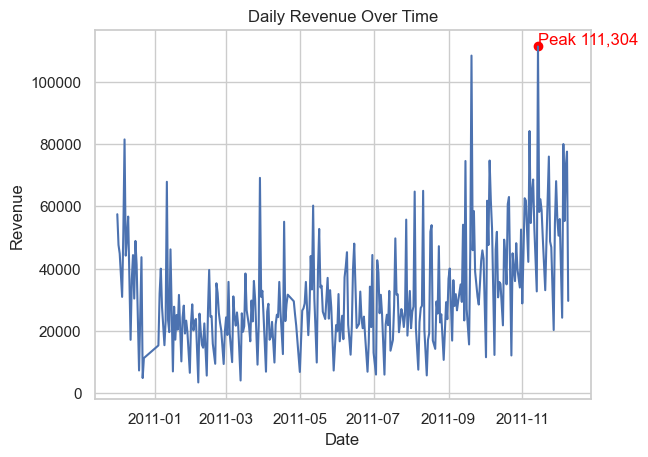

In [163]:
import matplotlib.pyplot as plt

# Find highest revenue day
max_date = daily_revenue.idxmax()
max_value = daily_revenue.max()

# Make a basic line chart
plt.plot(daily_revenue.index, daily_revenue.values)

# Highlight the peak with a red dot
plt.scatter(max_date, max_value, color='red')

# Add label for the peak
plt.text(
    max_date,
    max_value,
    f'Peak {max_value:,.0f}',
    color='red',
    ha='left',
    va='bottom'
)

# Add x & y labels and chart title: 
plt.title('Daily Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')

plt.show()


# Average revenue across the business

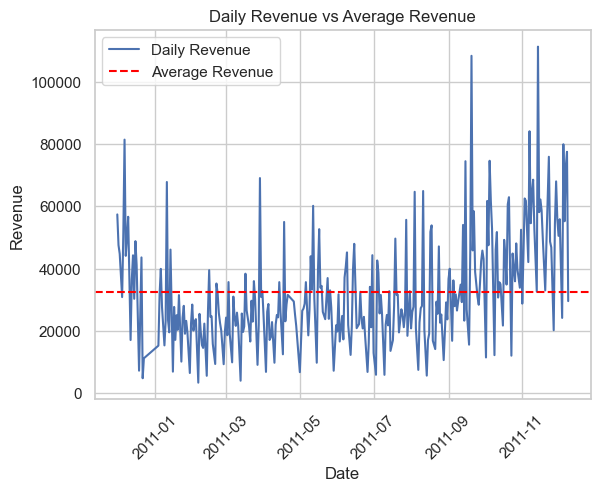

In [164]:
# Calculate the average revenue
average_revenue = daily_revenue.mean()

# Plot daily revenue
plt.plot(daily_revenue.index, daily_revenue.values, label='Daily Revenue')

# Plot the average as a straight horizontal line
plt.axhline(average_revenue, color='red', linestyle='--', label='Average Revenue')

# Labels
plt.title('Daily Revenue vs Average Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)

plt.legend()
plt.show()


In [165]:
average_revenue = daily_revenue.mean()
print("Average revenue over time:", round(average_revenue, 2))

Average revenue over time: 32658.54


In [166]:
# Since this is global data across 38 countries, the biggest issue is that I can't confirm the currency.
# The dataset has no accompanying information and I'm not sure how to do this yet.

# My plan is to review the UK sales subset only for this project, which I know will be in £GPB:
uk_df = df[df["Country"] == "United Kingdom"]

# UK Sales focus

# Daily revenue over time (UK only)

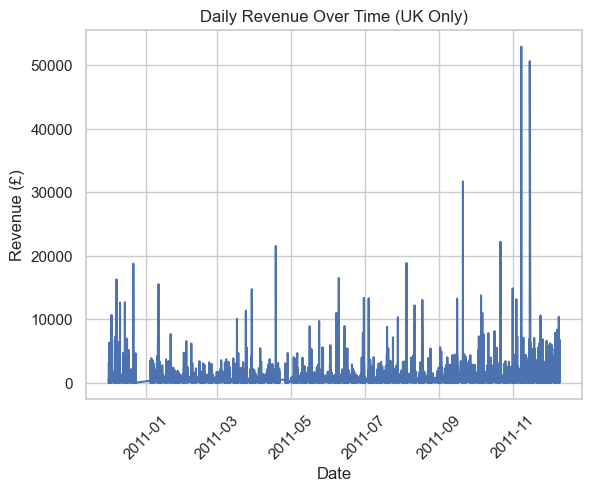

In [167]:
uk_daily_revenue = uk_df.groupby("InvoiceDate")["SalesTotal"].sum()
plt.plot(uk_daily_revenue.index, uk_daily_revenue.values)

plt.title("Daily Revenue Over Time (UK Only)")
plt.xlabel("Date")
plt.ylabel("Revenue (£)")
plt.xticks(rotation=45)

plt.show()

# Quantity of products VS Revenue

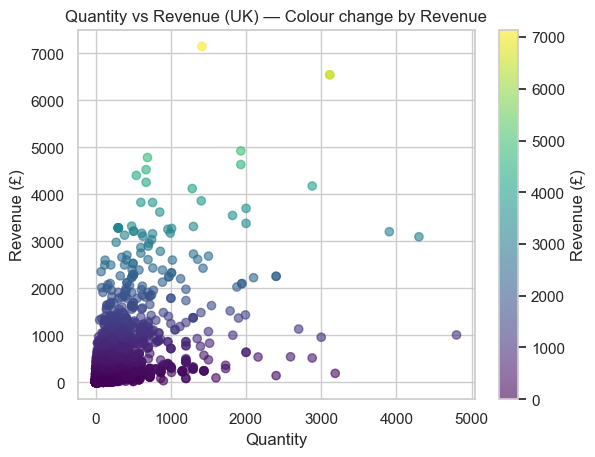

In [168]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

uk_df = df[df["Country"] == "United Kingdom"]

# Define revenue for colour mapping
revenue = uk_df["SalesTotal"]

# Scatter plot
plt.scatter(
    uk_df["Quantity"],
    uk_df["SalesTotal"],
    c=revenue,           # colour based on revenue
    cmap="viridis",      # colour palette
    alpha=0.6            # transparency
)

# Titles and labels
plt.title("Quantity vs Revenue (UK) — Colour change by Revenue")
plt.xlabel("Quantity")
plt.ylabel("Revenue (£)")

# Colourbar
plt.colorbar(label="Revenue (£)")

plt.show()

Whilst the majority of sales are low value and low quantity, a few high value customers are placing extremely high quantity orders, skewing the data.

# Seasonality

In [169]:
# It's difficult to see seasonality in this chart. Let's try another way.

df["year"] = df["InvoiceDate"].dt.year
df["month"] = df["InvoiceDate"].dt.month

monthly_revenue = df.groupby(["year", "month"])["SalesTotal"].sum()

# I need a matrix showing revenue by month for each year
monthly_revenue = monthly_revenue.unstack(level=0)
monthly_revenue

year,2010,2011
month,,
1,NaN,593255.86
2,NaN,507866.54
3,NaN,689841.84
4,NaN,515469.66
5,NaN,740006.48
6,NaN,697914.49
7,NaN,688087.67
8,NaN,724173.16
9,NaN,1028255.38


At first, this table was disconcerting as I thought I had further NaN values that I hadn't cleaned. However, on reviewing the dates of the available dataset, it runs from Dec 2010. Therefore I can conclude that December 2010 and October 2011 were the best performing months. Likely due to Christmas and Halloween product sales, from checking the product data.

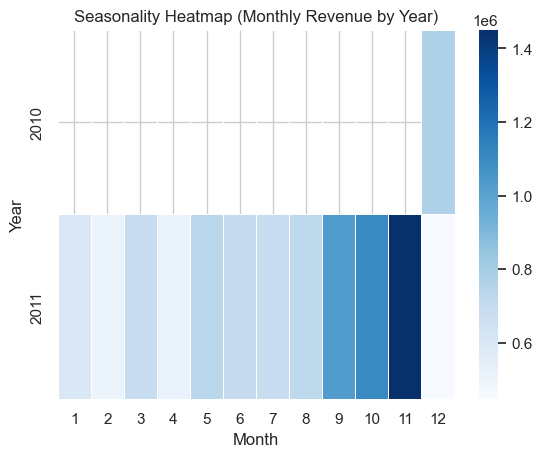

In [170]:
season = df.groupby(["year", "month"])["SalesTotal"].sum().unstack()

sns.heatmap(season, cmap="Blues", linewidths=0.5)

plt.title("Seasonality Heatmap (Monthly Revenue by Year)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

# Basket value VS orders

In [171]:
basket_values = df.groupby("InvoiceNo")["SalesTotal"].sum()
basket_filtered = basket_values[basket_values <= 10000]

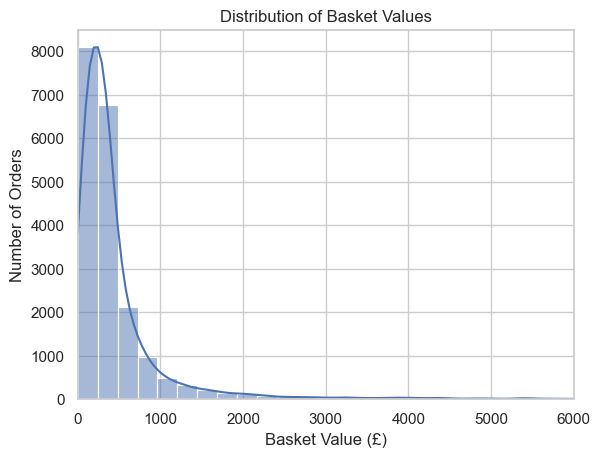

In [172]:
sns.histplot(basket_filtered, bins=40, kde=True)

plt.title("Distribution of Basket Values")
plt.xlabel("Basket Value (£)")
plt.ylabel("Number of Orders")

plt.xlim(0, 6000)
plt.show()

# PRODUCT VISUALISATIONS

Top 10 products in the UK

In [173]:
product_revenue = (
    uk_df.groupby("Description")["SalesTotal"]
         .sum()
         .sort_values(ascending=False)
         .head(10)
)

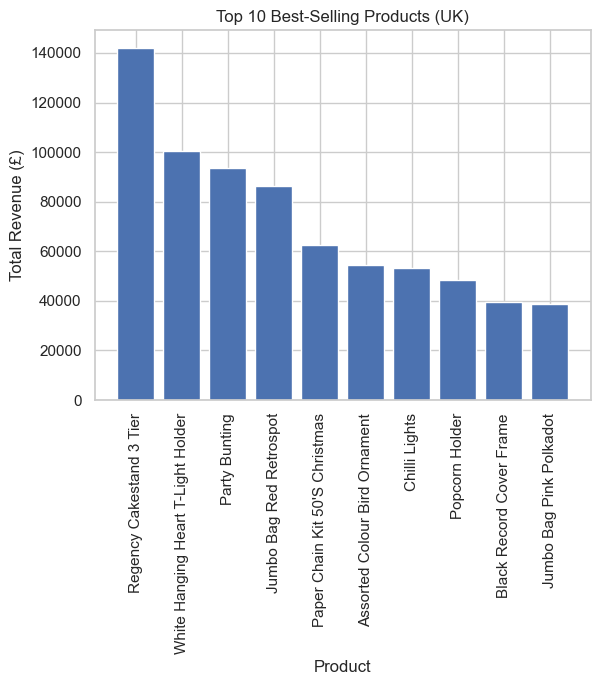

In [174]:
plt.bar(product_revenue.index, product_revenue.values)

plt.title("Top 10 Best-Selling Products (UK)")
plt.xlabel("Product")
plt.ylabel("Total Revenue (£)")
plt.xticks(rotation=90)

plt.show()

# Creating unit price bands

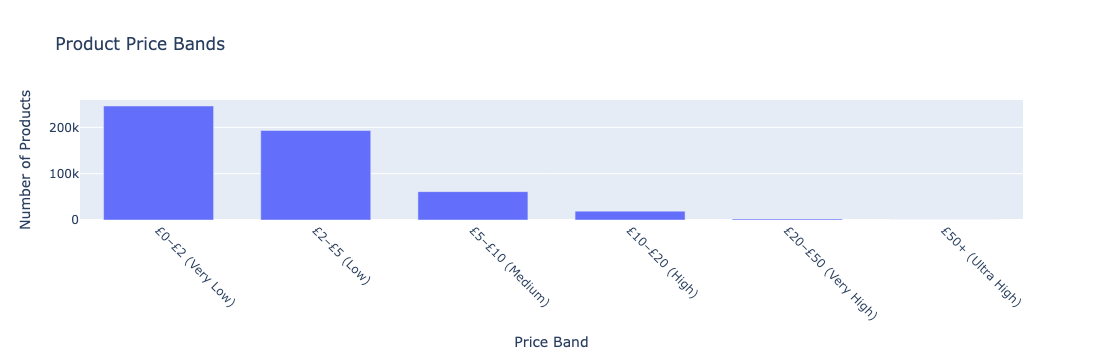

In [197]:
# create price categories
bins = [0, 2, 5, 10, 20, 50, df["UnitPrice"].max()]
labels = [
    "£0–£2 (Very Low)",
    "£2–£5 (Low)",
    "£5–£10 (Medium)",
    "£10–£20 (High)",
    "£20–£50 (Very High)",
    "£50+ (Ultra High)"
]

df["price_band"] = pd.cut(
    df["UnitPrice"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# count how many products in each category
price_band_counts = df["price_band"].value_counts().sort_index()

# Plot my chart
import plotly.express as px

fig = px.bar(
    x=price_band_counts.index,
    y=price_band_counts.values,
    title="Product Price Bands",
    labels={"x": "Price Band", "y": "Number of Products"},
)

fig.update_layout(
    xaxis_tickangle=45,
    bargap=0.3
)


fig.show()


# BUYER BEHAVIOUR

# All UK customers by spend

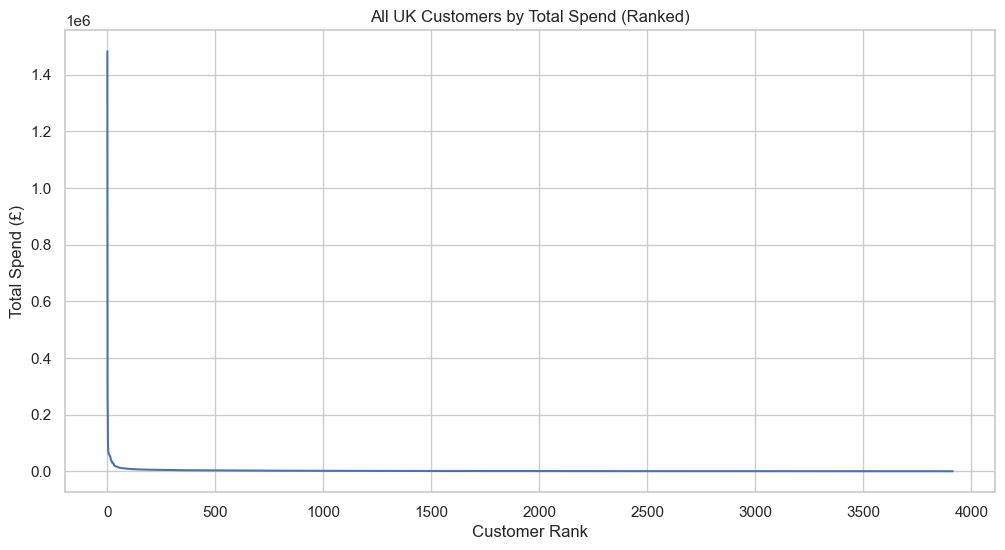

In [175]:
uk_df = df[df["Country"] == "United Kingdom"]

uk_spend = (
    uk_df.groupby("CustomerID")["SalesTotal"]
         .sum()
         .sort_values(ascending=False)
)

plt.figure(figsize=(12, 6))

plt.plot(uk_spend.values)

plt.title("All UK Customers by Total Spend (Ranked)")
plt.xlabel("Customer Rank")
plt.ylabel("Total Spend (£)")

plt.show()

# Top 10 Customers by Total Spending (UK Only)

In [176]:
uk_df = df[df["Country"] == "United Kingdom"]


In [177]:
customer_spend = (
    uk_df.groupby("CustomerID")["SalesTotal"]
         .sum()
         .sort_values(ascending=False)
         .head(10)
)

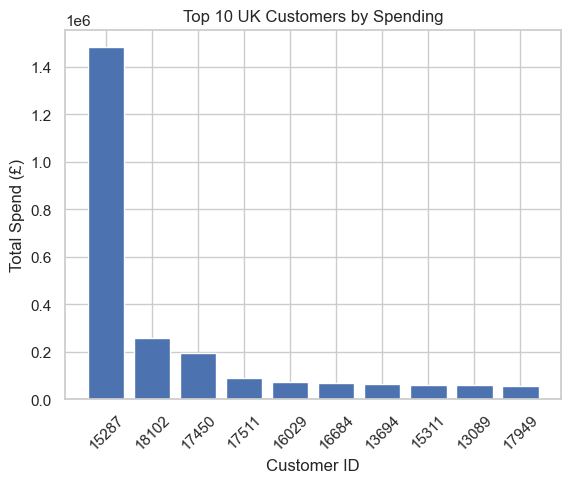

In [178]:
plt.bar(customer_spend.index.astype(str), customer_spend.values)

plt.title("Top 10 UK Customers by Spending")
plt.xlabel("Customer ID")
plt.ylabel("Total Spend (£)")
plt.xticks(rotation=45)

plt.show()

This online retail company has a very long tail distribution.  A small number of customers create huge revenue for the business,  followed by a long tail of customers that each contribute a small amount of revenue.  

# Distribution of Order Values

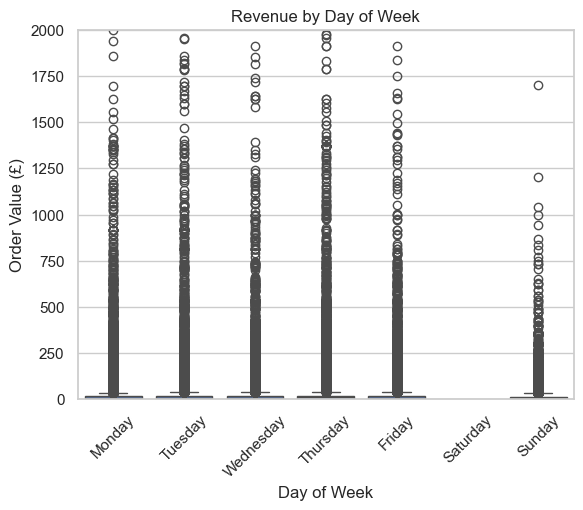

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create day names
df["day_of_week"] = df["InvoiceDate"].dt.day_name()

# Order days Mon–Sun
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Filter revenue to values up to £2,000 for better visualisation
df_filtered = df[df["SalesTotal"] <= 2000]

# Create the boxplot
sns.boxplot(
    data=df_filtered,
    x="day_of_week",
    y="SalesTotal",
    order=day_order
)

plt.title("Revenue by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Order Value (£)")
plt.xticks(rotation=45)
plt.ylim(0, 2000)

plt.show()

No sales on Saturday is as I would expect. Given the volumes of orders, it looks like a wholesale business. This equates with no Saturday sales. It is intriguing, however, that Sunday sales are as high as they are. 

# Product Frequency

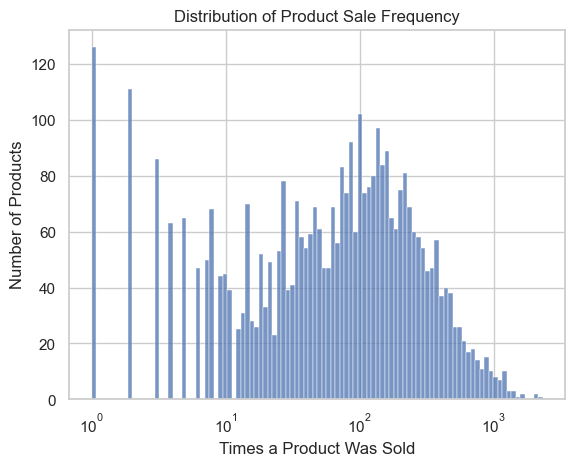

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

# How often each product appear?
product_counts = df["Description"].value_counts()

sns.histplot(product_counts, bins=100, log_scale=True)

plt.title("Distribution of Product Sale Frequency")
plt.xlabel("Times a Product Was Sold")
plt.ylabel("Number of Products")
plt.show()

A huge number of products sold only once or twice
A very small number sold hundreds or thousands of times
This log scale is great at revealing the long tail clearly. Most products were sold 10 to the power of 2 = 100.

# Top-to-Bottom Product Frequency

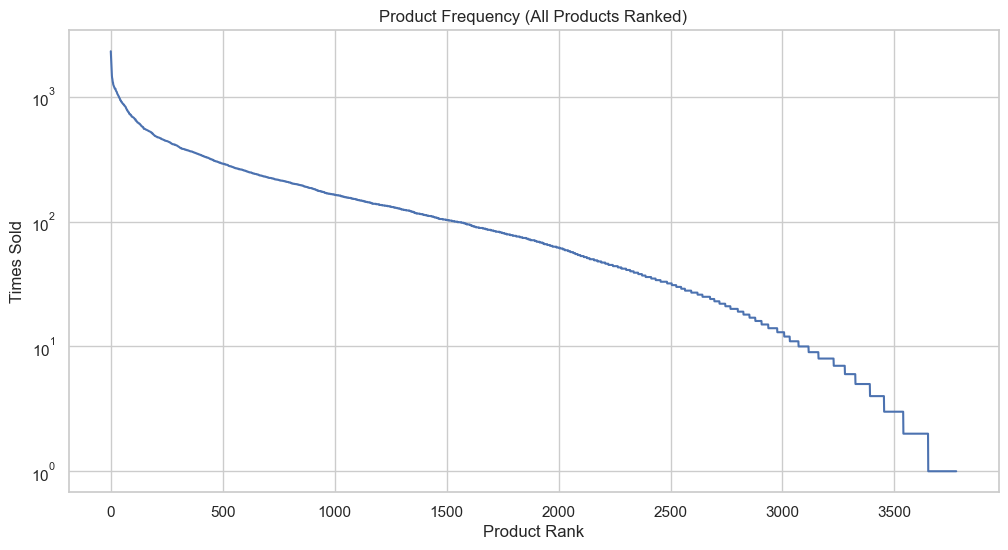

In [181]:
product_counts = df["Description"].value_counts()

plt.figure(figsize=(12, 6))
plt.plot(product_counts.values)

plt.title("Product Frequency (All Products Ranked)")
plt.xlabel("Product Rank")
plt.ylabel("Times Sold")
plt.yscale("log")   # Makes the long tail visible

plt.show()

A handful of products make up most of the sales revenue (not dis-similar to customers). 
It looks like a small proportion of the very large product catalogue is sold frequently.
Most products are bought infrequently (in line with the long tail distribution).

# Customer segment distribution

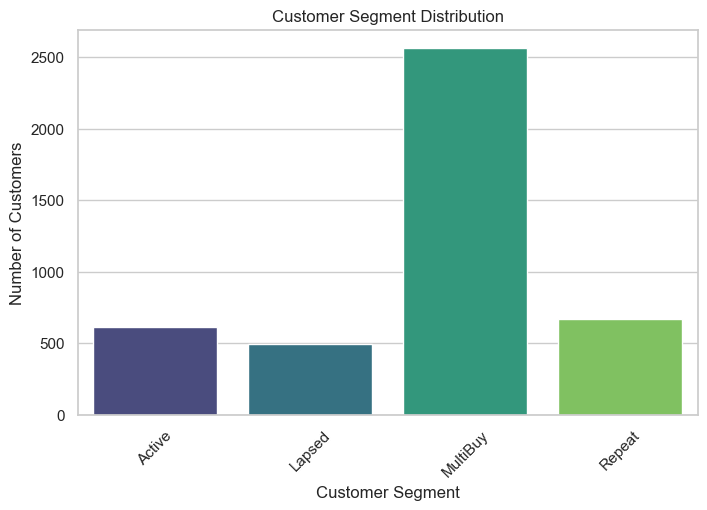

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt

customer_df = pd.read_csv("Customer_Segments_with_basket_value_heavy_multibuy.csv")

# Count how many customers fall into each segment?
segment_counts = customer_df["segment"].value_counts().sort_index()

plt.figure(figsize=(8, 5))

sns.barplot(
    x=segment_counts.index,
    y=segment_counts.values,
    hue=segment_counts.index,   
    palette="viridis",          
    legend=False                
)

plt.title("Customer Segment Distribution")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)

plt.show()

I created these segments before I was aware that this online retailer was a wholesaler. Therefore, multibuy is a somewhat redundant segment. I want to delve deeper into recency and frequency without the skew of multibuy next. 

I've opted for an RFM model:

R = Recency (how recently the customer last ordered)
F = Frequency (how many orders they placed)
M = Monetary (how much they spent)

As a marketer this is incredibly valuable as I can ascertain:
Customer loyalty
Any risk of losing good customers
Good for B2B wholesale ordering patterns and doesn't depend on multibuy behaviour

Examples of RFM-based labels:
Top Customers / High-Value Customers / Regular Buyers / Steady Buyers / At-Risk Accounts / Dormant Customers

# Recency/Frequency

In [208]:
# FULL DISCLOSURE: I got help from ChatGPT for recency/frequency set up as I got really stuck on this one, but really wanted to learn how to do it. 

In [209]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

reference_date = df["InvoiceDate"].max() + pd.Timedelta(days=1) # based on 1 day after last order

rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (reference_date - x.max()).days,   # Recency
    "InvoiceNo": "nunique",                                     # Frequency
    "SalesTotal": "sum"                                         # Monetary
})

rfm.columns = ["Recency", "Frequency", "Monetary"]

In [210]:
# Recency: lower recency = better score
rfm["R_score"] = pd.qcut(rfm["Recency"], 4, labels=[4, 3, 2, 1])

# Frequency: higher frequency = better score
rfm["F_score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 4, labels=[1, 2, 3, 4])

# Monetary: higher spend = better score
rfm["M_score"] = pd.qcut(rfm["Monetary"], 4, labels=[1, 2, 3, 4])

In [211]:
rfm["RFM_score"] = (
    rfm["R_score"].astype(str) +
    rfm["F_score"].astype(str) +
    rfm["M_score"].astype(str)
)

In [216]:
def rfm_segment_uk(row):
    r = int(row["R_score"])
    f = int(row["F_score"])
    m = int(row["M_score"])

    # Top Customers (recent, frequent, high spend)
    if r == 4 and f == 4 and m == 4:
        return "Top Customers"

    # High-Value Customers (recent or strong spend & frequency)
    if r >= 3 and m >= 3:
        return "High-Value Customers"

    # Regular Buyers (recent and frequent buyers)
    if r >= 3 and f >= 3:
        return "Regular Buyers"

    # Steady Buyers (middle scores)
    if r >= 2 and f >= 2:
        return "Steady Buyers"

    # At-Risk Accounts (haven't bought recently)
    if r <= 2 and f <= 2:
        return "At-Risk Accounts"

    # Dormant Customers (no activity for a long time)
    if r == 1:
        return "Dormant Customers"

    # Default catch-all
    return "Steady Buyers"

In [217]:
rfm["Segment"] = rfm.apply(rfm_segment_uk, axis=1)

In [218]:
rfm["Segment"].value_counts()

Segment
Steady Buyers           1286
At-Risk Accounts        1215
High-Value Customers     953
Top Customers            497
Regular Buyers           209
Dormant Customers        173
Name: count, dtype: int64

# RFM charts

FULL DISCLOSURE: I got help from chatgpt to understand how to remove an outlier that was skewing my data. Outcome: I included a line to cap the frequency at the 99th percentile. The rest I completed myself. 

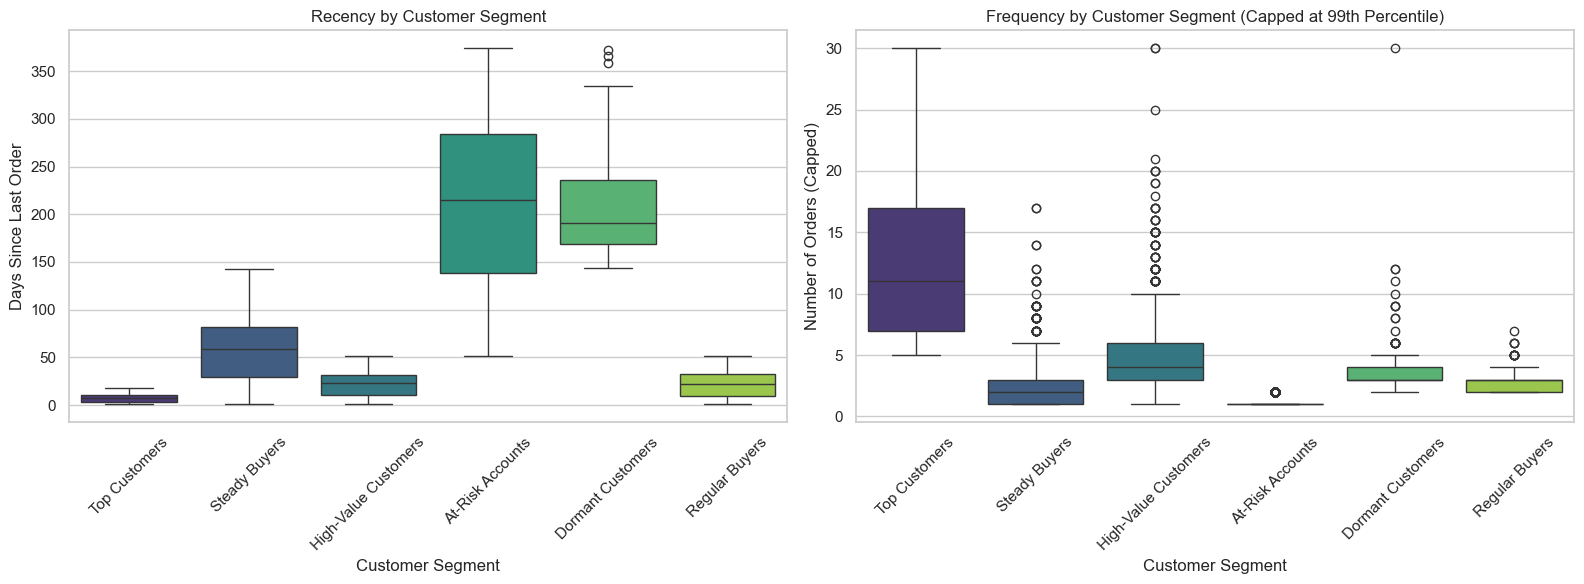

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cap frequency at the 99th percentile (to exclude my extreme outlier value)
freq_cap = rfm["Frequency"].quantile(0.99)
rfm["Frequency_capped"] = rfm["Frequency"].clip(upper=freq_cap)

# 2 boxplots side by side
plt.figure(figsize=(16, 6))

# recency (left)
plt.subplot(1, 2, 1)
sns.boxplot(
    data=rfm,
    x="Segment",
    y="Recency",
    hue="Segment",       
    palette="viridis",
    legend=False
)
plt.title("Recency by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Days Since Last Order")
plt.xticks(rotation=45)

# requency(right)
plt.subplot(1, 2, 2)
sns.boxplot(
    data=rfm,
    x="Segment",
    y="Frequency_capped",
    hue="Segment",       
    palette="viridis",
    legend=False
)
plt.title("Frequency by Customer Segment (Capped at 99th Percentile)")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Orders (Capped)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Export customer segments for marketing output

In [228]:
# mapping my UK segment names to clean files
segment_filenames = {
    "Top Customers": "top_customers.csv",
    "High-Value Customers": "high_value_customers.csv",
    "Regular Buyers": "regular_buyers.csv",
    "Steady Buyers": "steady_buyers.csv",
    "At-Risk Accounts": "at_risk_accounts.csv",
    "Dormant Customers": "dormant_customers.csv"
}

# Save the files
for segment_name, filename in segment_filenames.items():
    segment_customers = rfm[rfm["Segment"] == segment_name]
    segment_customers.to_csv(filename, index=True)
    print(f"Saved: {filename}")

Saved: top_customers.csv
Saved: high_value_customers.csv
Saved: regular_buyers.csv
Saved: steady_buyers.csv
Saved: at_risk_accounts.csv
Saved: dormant_customers.csv
